In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train=pd.read_csv('datasets/train.csv')
test=pd.read_csv('datasets/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
dataset=pd.concat((train, test), axis=0)

In [8]:
dataset.set_index('PassengerId',inplace=True)

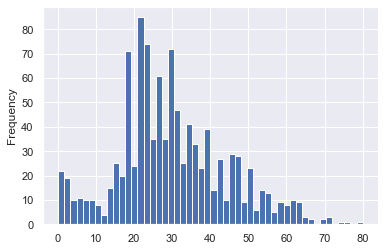

In [9]:
dataset['Age'].plot.hist(bins=50);

In [10]:
dataset['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [11]:
age_mean=dataset['Age'].mean()
age_std=dataset['Age'].std()
size=dataset['Age'].isna().sum()
random_list=np.random.randint(low=age_mean-age_std, high=age_mean+age_std, size=size)
dataset['Age'][dataset['Age'].isna()]=random_list

C:\Users\sKuma\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


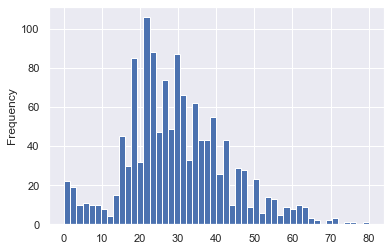

In [12]:
dataset['Age'].plot.hist(bins=50);

In [13]:
dataset['Age'].describe()

count    1309.000000
mean       29.736188
std        13.417096
min         0.170000
25%        21.000000
50%        28.000000
75%        38.000000
max        80.000000
Name: Age, dtype: float64

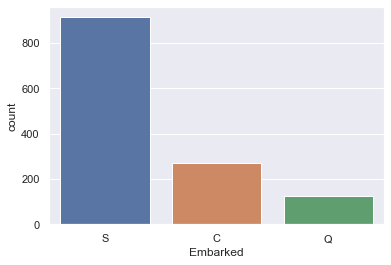

In [14]:
sns.countplot('Embarked', data=dataset);

In [15]:
dataset['Embarked'].fillna('S', inplace=True)

In [16]:
dataset.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

In [17]:
dataset['Family_size']=dataset['SibSp']+dataset['Parch']+1

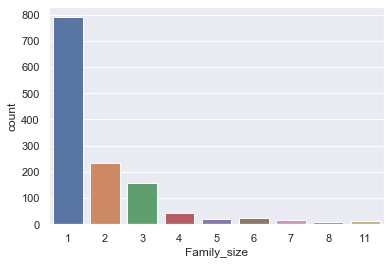

In [18]:
sns.countplot('Family_size', data=dataset)

In [19]:
dataset['Fare'][dataset['Fare'].isna()]

PassengerId
1044   NaN
Name: Fare, dtype: float64

In [20]:
dataset.loc[1044]

Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Family_size                     1
Name: 1044, dtype: object

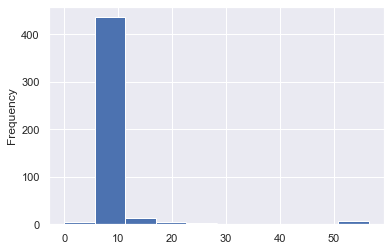

In [21]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==1)),'Fare'].plot.hist()

In [22]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==1)),'Fare'].median()

7.8542

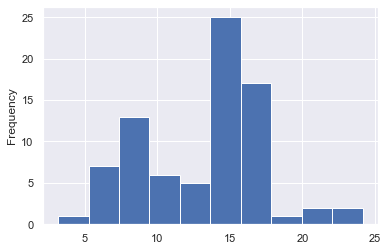

In [23]:
dataset.loc[((dataset['Pclass']==3) & (dataset['Family_size']==2)),'Fare'].plot.hist();

In [24]:
dataset['Fare'].fillna(7.8542, inplace=True)

In [25]:
dataset.drop('Cabin', axis=1, inplace=True)

In [26]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


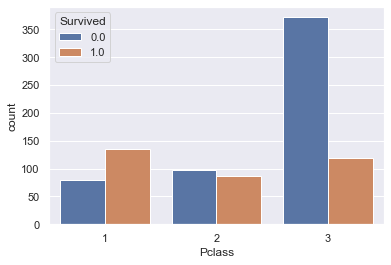

In [27]:
sns.countplot('Pclass', hue='Survived', data=dataset)

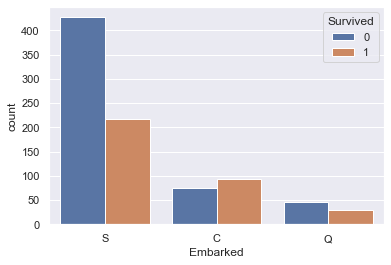

In [28]:
sns.countplot('Embarked', hue='Survived', data=train)

In [29]:
pclass=(train.groupby('Pclass')['Survived'].mean()*10)/2.423625
pclass

Pclass
1    2.597884
2    1.950904
3    1.000000
Name: Survived, dtype: float64

In [30]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

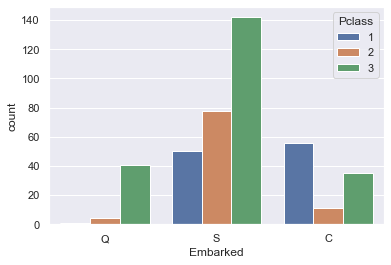

In [31]:
sns.countplot('Embarked', hue='Pclass', data=test);

In [32]:
dataset['Pclass']=dataset['Pclass'].map(pclass) 

In [33]:
dataset=pd.concat((dataset,pd.get_dummies(dataset.Embarked, drop_first=True)), axis=1)

In [34]:
dataset.groupby('Sex')["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [35]:
sex={'male':0,'female':1}
dataset['Sex']=dataset['Sex'].map(sex)

In [36]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Q,S
PassengerId,,,,,,,,,,,,,
1,0.0,1.000000,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0,1
2,1.0,2.597884,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0,0
3,1.0,1.000000,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1
4,1.0,2.597884,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0,1
5,0.0,1.000000,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,1.000000,"Spector, Mr. Woolf",0,37.0,0,0,A.5. 3236,8.0500,S,1,0,1
1306,NaN,2.597884,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,1,0,0
1307,NaN,1.000000,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1


In [37]:
dataset.drop(['Name', 'SibSp', 'Parch', 'Ticket','Embarked'], axis=1,inplace=True)

In [38]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Family_size,Q,S
PassengerId,,,,,,,,
1,0.0,1.000000,0,22.0,7.2500,2,0,1
2,1.0,2.597884,1,38.0,71.2833,2,0,0
3,1.0,1.000000,1,26.0,7.9250,1,0,1
4,1.0,2.597884,1,35.0,53.1000,2,0,1
5,0.0,1.000000,0,35.0,8.0500,1,0,1


In [39]:
x=dataset.drop('Survived', axis=1)
y=dataset['Survived'].values

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [41]:
x.shape

(1309, 7)

In [42]:
train_x=x[:891,:]
test_x=x[891:1310,:]
train_y=y[:891]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10,shuffle=True, random_state=0)

In [45]:
clf=LogisticRegression(max_iter=1000)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.83333333, 0.7752809 , 0.79775281, 0.78651685, 0.80898876,
       0.80898876, 0.7752809 , 0.84269663, 0.78651685, 0.79775281])

In [46]:
score.mean()

0.8013108614232209

In [47]:
clf=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.78888889, 0.80898876, 0.7752809 , 0.79775281, 0.83146067,
       0.82022472, 0.7752809 , 0.80898876, 0.78651685, 0.7752809 ])

In [48]:
score.mean()

0.7968664169787765

In [49]:
clf=SVC(random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.8       , 0.80898876, 0.79775281, 0.83146067, 0.86516854,
       0.82022472, 0.80898876, 0.82022472, 0.79775281, 0.79775281])

In [50]:
score.mean()

0.8148314606741571

In [51]:
clf=GaussianNB()
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.81111111, 0.79775281, 0.78651685, 0.76404494, 0.7752809 ,
       0.79775281, 0.7752809 , 0.83146067, 0.79775281, 0.83146067])

In [52]:
score.mean()

0.7968414481897628

In [53]:
clf=DecisionTreeClassifier(random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.78888889, 0.78651685, 0.78651685, 0.75280899, 0.78651685,
       0.74157303, 0.7752809 , 0.75280899, 0.74157303, 0.71910112])

In [54]:
score.mean()

0.7631585518102373

In [55]:
clf=RandomForestClassifier(n_estimators=12, random_state=0)
score=cross_val_score(clf, train_x,train_y, cv=kfold)
score

array([0.8       , 0.82022472, 0.78651685, 0.75280899, 0.82022472,
       0.85393258, 0.82022472, 0.78651685, 0.7752809 , 0.7752809 ])

In [56]:
score.mean()

0.7991011235955057

In [57]:
clf=SVC(random_state=0)
clf.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
y_pred=clf.predict(test_x).astype(int)

In [60]:
PassengerId=pd.read_csv('datasets/gender_submission.csv')['PassengerId']
pd.DataFrame({'Survived':y_pred}, index=PassengerId).to_csv('titanic_pred.csv')